(1877, 28, 28)


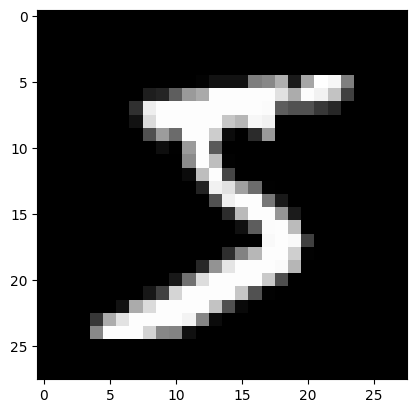

In [1]:
import matplotlib.colors as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Data = np.loadtxt('MNIST-5-6-subset.txt')
labels = np.loadtxt('MNIST-5-6-Subset-Labels.txt')

labels = labels
Images = np.reshape(Data, (1877,28,28)).swapaxes(1,2) #Image representation of the data

print(Images.shape)
plt.imshow(Images[0], 'gray', cm.NoNorm())

# KNN IMPLEMENTATION

In [2]:
#this class design/setup comes from my exam hand-in in the course MAD
class NearestNeighbor:
    
    def __init__(self, dist_matrix=None):
        
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X_val, n_neighbors=1): 
        
        Listedpredictions = []
        
        for x in range(len(X_val)):

            test_image = np.reshape(X_val[x],(784,1))

            predictions = []

            Xmark = np.tile(test_image, (1,100)) # 100 cols of 784p digits
            distMatrixTransposed = (self.X_train.T - Xmark).T #distance matrix between test point x and training data x_1...x_n
            distMatrix = self.X_train.T - Xmark
            DiagonalEucDistM = np.dot(distMatrixTransposed, distMatrix) #Distance matrix where the diagonal is the euclidean distance between x and some x_n
            EucDistances = np.diag(DiagonalEucDistM) #array with the euclidean distances only

            EucDistances = np.argsort(EucDistances)#get the indices of how distances would be sorted

            for neighbour in range(n_neighbors): #couldn't figure out the vector operations for this loop
                predictions.append(max(self.t_train[EucDistances[:neighbour+1]], key=np.ndarray.tolist(self.t_train[EucDistances[:neighbour+1]]).count))#final guess for the given x added to prediction
            print(predictions)
            Listedpredictions.append(predictions) #a list containing n_neighbors predictions, one for each k
        return np.asarray(Listedpredictions)

    def zero_one_loss (self, t):              
        return [0 if elm == 0 else 1 for elm in t]
    
    def ValError(self, t):
        return np.mean(self.zero_one_loss(t))


# TASK #1

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5

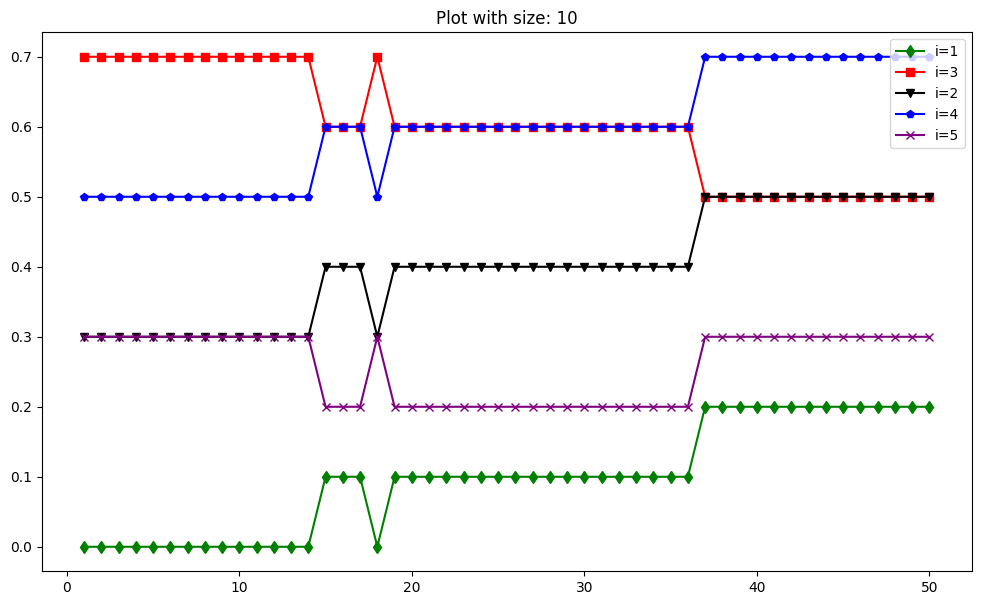

In [3]:
df = Data.reshape(1877, 784) #Images are written row-wise, hence the swap of dimensions

X_train_data, X_val_data = df[:100], df[100:]
t_train_data, t_val_data = labels[:100], labels[100:]
n = [10]#,20,40,80
K = np.arange(1,51)
variance10 = []
variance20 = []
variance40 = []
variance80 = []

#5 sets of size 10, 5 of size 20.. and so on

KNN = NearestNeighbor()
KNN.fit(X_train_data, t_train_data)

for size in n: #create 5 sets for each n, overwrite old sets
    X_Val_data1 = X_val_data[1*size:(1+1)*size] # i = 1
    t_Val_data1 = np.asarray(t_val_data[1*size:(1+1)*size]) # i = 1
    valError1 = []
    predictions1 = KNN.predict(X_Val_data1,50) - t_Val_data1[:,np.newaxis]
    print(predictions1)

    X_Val_data2 = df[100+2*size:100+(2+1)*size] # i = 2
    t_Val_data2 = np.asarray(labels[100+2*size:100+(2+1)*size]) # i = 2
    valError2 = []
    predictions2 = KNN.predict(X_Val_data1,50) - t_Val_data2[:,np.newaxis]
    
    X_Val_data3 = df[100+3*size:100+(3+1)*size] # i = 3
    t_Val_data3 = np.asarray(labels[100+3*size:100+(3+1)*size]) # i = 3
    valError3 = []
    predictions3 = KNN.predict(X_Val_data1,50) - t_Val_data3[:,np.newaxis]

    X_Val_data4 = df[100+4*size:100+(4+1)*size] # i = 4
    t_Val_data4 = np.asarray(labels[100+4*size:100+(4+1)*size]) # i = 4
    valError4 = []
    predictions4 = KNN.predict(X_Val_data1,50) - t_Val_data4[:,np.newaxis]

    X_Val_data5 = df[100+5*size:100+(5+1)*size] # i = 5
    t_Val_data5 = np.asarray(labels[100+5*size:100+(5+1)*size]) # i = 5
    valError5 = []
    predictions5 = KNN.predict(X_Val_data1,50) - t_Val_data5[:,np.newaxis]
    
    for m in K: #create lists of validations errors to plot as a function of k
        valError1.append(KNN.ValError([i[m-1] for i in predictions1]))
        valError2.append(KNN.ValError([i[m-1] for i in predictions2]))
        valError3.append(KNN.ValError([i[m-1] for i in predictions3]))
        valError4.append(KNN.ValError([i[m-1] for i in predictions4]))
        valError5.append(KNN.ValError([i[m-1] for i in predictions5]))
    print(valError1)
    
    #creating and saving a figure with the plotted data through each iteration of n
    plt.figure(figsize=(12,7)) #!!!ALWAYS HAVE FIGSIZE FIRST OR THE OUTPUT PLOTS WILL START TO BUG!!!
    plt.title((f"Plot with size: {size}"))
    plt.plot(K, valError1, color='green', label="i=1", marker='d')
    plt.plot(K, valError3, color='red', label="i=3", marker='s')
    plt.plot(K, valError2, color='black', label="i=2", marker='v')
    plt.plot(K, valError4, color='blue', label="i=4", marker='p')
    plt.plot(K, valError5, color='purple', label="i=5", marker='x')
    plt.legend(loc=1)
    plt.savefig((f"plot{size}.png"), bbox_inches="tight")

    #2D-array containg the validation errors. Used for easier calculating the variance
    listedValError = []
    listedValError.append(valError1)
    listedValError.append(valError2)
    listedValError.append(valError3)
    listedValError.append(valError4)
    listedValError.append(valError5)

    
    for m in K:
        #hardcode solution for appending to the correct list. Could be improved
        if size == 10:
            variance10.append(np.var([i[m-1] for i in listedValError]))
        elif size == 20:
            variance20.append(np.var([i[m-1] for i in listedValError]))
        elif size == 40:
            variance40.append(np.var([i[m-1] for i in listedValError]))
        else: 
            variance80.append(np.var([i[m-1] for i in listedValError]))
    


In [4]:
print(labels[100+1*10+1])

5.0


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

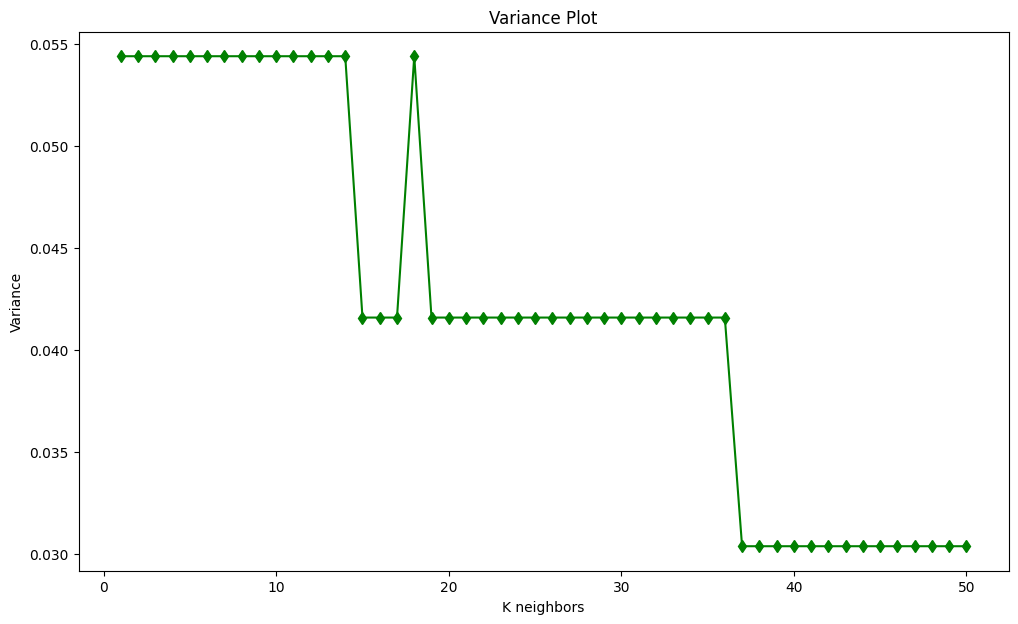

In [5]:
plt.figure(figsize=(12,7))
plt.title("Variance Plot")
plt.xlabel('K neighbors')
plt.ylabel('Variance')
plt.plot(K, variance10, color='green', marker='d', label='size=10')
plt.plot(K, variance20, color='black', marker='v', label='size=20')
plt.plot(K, variance40, color='red', marker='s', label='size=40')
plt.plot(K, variance80, color='blue', marker='p', label='size=80')
plt.legend(loc=1)
plt.savefig("varPlot.png")

# TASK #2

In [ ]:
Data = np.loadtxt('MNIST-5-6-Subset-Light-Corruption.txt')
df = (np.reshape(Data, (1877,784)))

X_train_data = df[0:100]

KNN = NearestNeighbor()
KNN.fit(X_train_data, t_train_data)

X_light1 = df[100+1*80:100+(1+1)*80] 
t_Val_light1 = labels[100+1*80:100+(1+1)*80] 
LightvalError1 = []
predictionsL1 = KNN.predict(X_light1,50)

X_light2 = df[100+2*80:100+(2+1)*80] 
t_Val_light2 = labels[100+1*80:100+(1+1)*80] 
LightvalError2 = []
predictionsL2 = KNN.predict(X_light2,50)

X_light3 = df[100+3*80:100+(3+1)*80] 
t_Val_light3 = labels[100+1*80:100+(1+1)*80] 
LightvalError3 = []
predictionsL3 = KNN.predict(X_light3,50)

X_light4 = df[100+4*80:100+(4+1)*80] 
t_Val_light4 = labels[100+1*80:100+(1+1)*80] 
LightvalError4 = []
predictionsL4 = KNN.predict(X_light4,50)

X_light5 = df[100+5*80:100+(5+1)*80] 
t_Val_light5 = labels[100+1*80:100+(1+1)*80]
LightvalError5 = []
predictionsL5 = KNN.predict(X_light5,50) 

for m in K: #create lists of validations errors to plot as a function of k
        LightvalError1.append(KNN.ValError([i[m-1] for i in predictionsL1], t_Val_light1))
        LightvalError2.append(KNN.ValError([i[m-1] for i in predictionsL2], t_Val_light2))
        LightvalError3.append(KNN.ValError([i[m-1] for i in predictionsL3], t_Val_light3))
        LightvalError4.append(KNN.ValError([i[m-1] for i in predictionsL4], t_Val_light4))
        LightvalError5.append(KNN.ValError([i[m-1] for i in predictionsL5], t_Val_light5))

plt.figure(figsize=(12,7))
plt.title((f"lightly corrupted"))
plt.xlabel('K neighbors')
plt.ylabel('Validation Error')
plt.plot(K, LightvalError1, color='green', label="i=1", marker='d')
plt.plot(K, LightvalError3, color='red', label="i=3", marker='s')
plt.plot(K, LightvalError2, color='black', label="i=2", marker='v')
plt.plot(K, LightvalError4, color='blue', label="i=4", marker='p')
plt.plot(K, LightvalError5, color='purple', label="i=5", marker='x')
plt.legend(loc=1)
plt.savefig((f"LightlyCorrupted.png"), bbox_inches="tight")


TypeError: ValError() takes 2 positional arguments but 3 were given

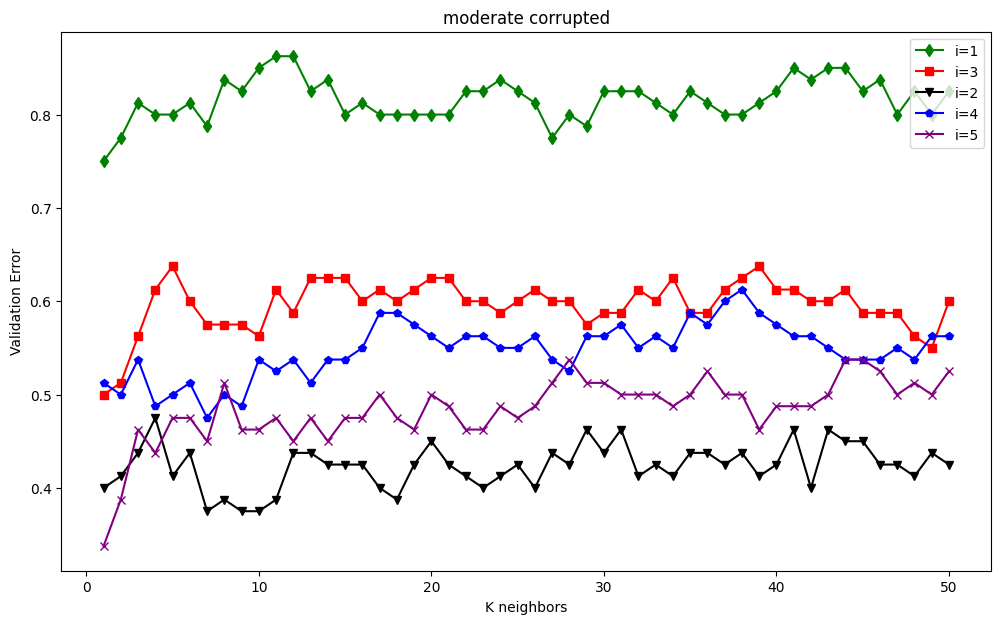

In [ ]:
Data = np.loadtxt('MNIST-5-6-Subset-moderate-Corruption.txt')
df = (np.reshape(Data, (1877,784)))

X_train_data = df[0:100]

KNN = NearestNeighbor()
KNN.fit(X_train_data, t_train_data)

X_moderate1 = df[100+1*80:100+(1+1)*80] 
t_Val_moderate1 = labels[100+1*80:100+(1+1)*80] 
moderatevalError1 = []
predictionsM1 = KNN.predict(X_moderate1,50)

X_moderate2 = df[100+2*80:100+(2+1)*80] 
t_Val_moderate2 = labels[100+1*80:100+(1+1)*80] 
moderatevalError2 = []
predictionsM2 = KNN.predict(X_moderate2,50)

X_moderate3 = df[100+3*80:100+(3+1)*80] 
t_Val_moderate3 = labels[100+1*80:100+(1+1)*80] 
moderatevalError3 = []
predictionsM3 = KNN.predict(X_moderate3,50)

X_moderate4 = df[100+4*80:100+(4+1)*80] 
t_Val_moderate4 = labels[100+1*80:100+(1+1)*80] 
moderatevalError4 = []
predictionsM4 = KNN.predict(X_moderate4,50)

X_moderate5 = df[100+5*80:100+(5+1)*80] 
t_Val_moderate5 = labels[100+1*80:100+(1+1)*80]
moderatevalError5 = []
predictionsM5 = KNN.predict(X_moderate5,50) 

for m in K: #create lists of validations errors to plot as a function of k
        moderatevalError1.append(KNN.ValError([i[m-1] for i in predictionsM1], t_Val_moderate1))
        moderatevalError2.append(KNN.ValError([i[m-1] for i in predictionsM2], t_Val_moderate2))
        moderatevalError3.append(KNN.ValError([i[m-1] for i in predictionsM3], t_Val_moderate3))
        moderatevalError4.append(KNN.ValError([i[m-1] for i in predictionsM4], t_Val_moderate4))
        moderatevalError5.append(KNN.ValError([i[m-1] for i in predictionsM5], t_Val_moderate5))

plt.figure(figsize=(12,7))
plt.title((f"moderate corrupted"))
plt.xlabel('K neighbors')
plt.ylabel('Validation Error')
plt.plot(K, moderatevalError1, color='green', label="i=1", marker='d')
plt.plot(K, moderatevalError3, color='red', label="i=3", marker='s')
plt.plot(K, moderatevalError2, color='black', label="i=2", marker='v')
plt.plot(K, moderatevalError4, color='blue', label="i=4", marker='p')
plt.plot(K, moderatevalError5, color='purple', label="i=5", marker='x')
plt.legend(loc=1)
plt.savefig((f"moderateCorrupted.png"), bbox_inches="tight")

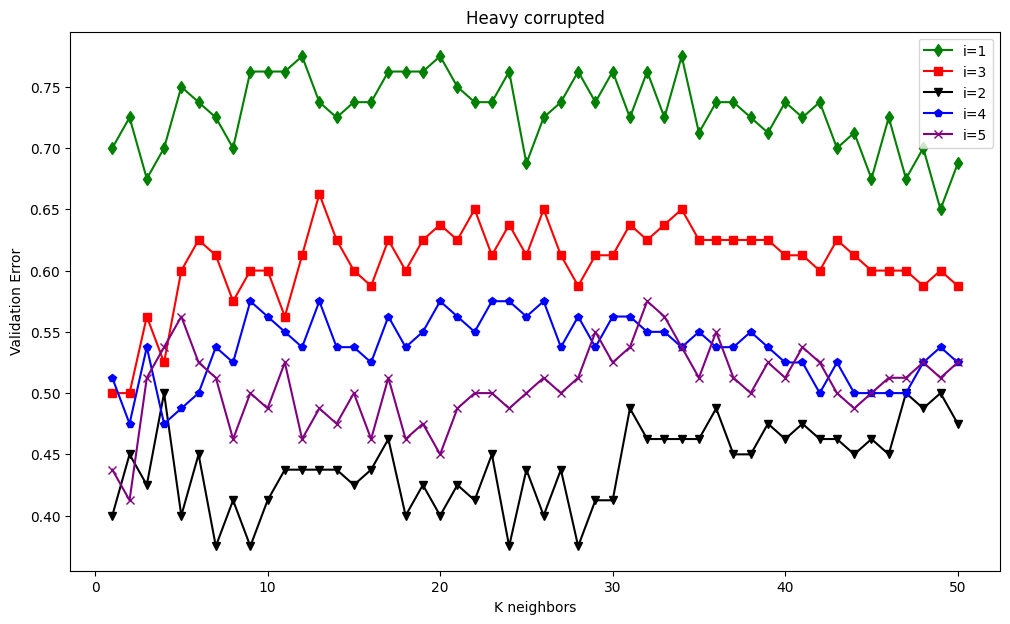

In [ ]:
Data = np.loadtxt('MNIST-5-6-Subset-Heavy-Corruption.txt')
df = (np.reshape(Data, (1877,784)))

X_train_data = df[0:100]

KNN = NearestNeighbor()
KNN.fit(X_train_data, t_train_data)

X_Heavy1 = df[100+1*80:100+(1+1)*80] 
t_Val_Heavy1 = labels[100+1*80:100+(1+1)*80] 
HeavyvalError1 = []
predictionsH1 = KNN.predict(X_Heavy1,50)

X_Heavy2 = df[100+2*80:100+(2+1)*80] 
t_Val_Heavy2 = labels[100+1*80:100+(1+1)*80] 
HeavyvalError2 = []
predictionsH2 = KNN.predict(X_Heavy2,50)

X_Heavy3 = df[100+3*80:100+(3+1)*80] 
t_Val_Heavy3 = labels[100+1*80:100+(1+1)*80] 
HeavyvalError3 = []
predictionsH3 = KNN.predict(X_Heavy3,50)

X_Heavy4 = df[100+4*80:100+(4+1)*80] 
t_Val_Heavy4 = labels[100+1*80:100+(1+1)*80] 
HeavyvalError4 = []
predictionsH4 = KNN.predict(X_Heavy4,50)

X_Heavy5 = df[100+5*80:100+(5+1)*80] 
t_Val_Heavy5 = labels[100+1*80:100+(1+1)*80]
HeavyvalError5 = []
predictionsH5 = KNN.predict(X_Heavy5,50) 

for m in K: #create lists of validations errors to plot as a function of k
        HeavyvalError1.append(KNN.ValError([i[m-1] for i in predictionsH1], t_Val_Heavy1))
        HeavyvalError2.append(KNN.ValError([i[m-1] for i in predictionsH2], t_Val_Heavy2))
        HeavyvalError3.append(KNN.ValError([i[m-1] for i in predictionsH3], t_Val_Heavy3))
        HeavyvalError4.append(KNN.ValError([i[m-1] for i in predictionsH4], t_Val_Heavy4))
        HeavyvalError5.append(KNN.ValError([i[m-1] for i in predictionsH5], t_Val_Heavy5))

plt.figure(figsize=(12,7))
plt.title((f"Heavy corrupted"))
plt.xlabel('K neighbors')
plt.ylabel('Validation Error')
plt.plot(K, HeavyvalError1, color='green', label="i=1", marker='d')
plt.plot(K, HeavyvalError3, color='red', label="i=3", marker='s')
plt.plot(K, HeavyvalError2, color='black', label="i=2", marker='v')
plt.plot(K, HeavyvalError4, color='blue', label="i=4", marker='p')
plt.plot(K, HeavyvalError5, color='purple', label="i=5", marker='x')
plt.legend(loc=1)
plt.savefig((f"HeavyCorrupted.png"), bbox_inches="tight")